In [118]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
bitcoin = pd.read_csv("data/train.zip",parse_dates=['Date'],index_col='Date')

In [120]:
bitcoin.head()

,Value
Date,
2016-01-01,164132.0
2016-01-02,123623.0
2016-01-03,142904.0
2016-01-04,141064.0
2016-01-05,170176.0


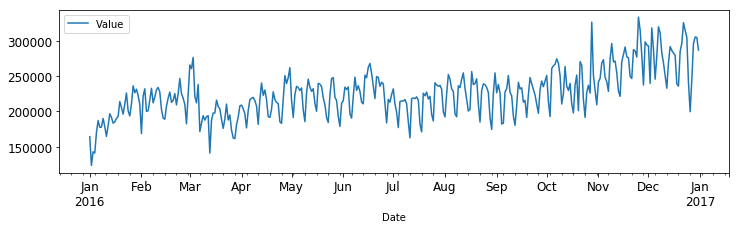

In [121]:
bitcoin.plot(y='Value',figsize=(12,3),fontsize=12)

In [122]:
bitcoin_monthly = bitcoin.resample('1M').mean()

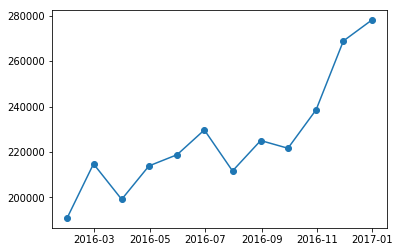

In [123]:
plt.plot(bitcoin_monthly.Value,"-o")

In [124]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

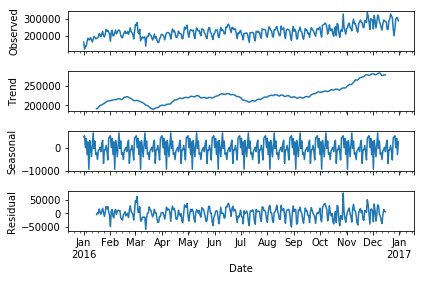

In [125]:
decomposition = seasonal_decompose(bitcoin.Value,freq=30)
fig = decomposition.plot()

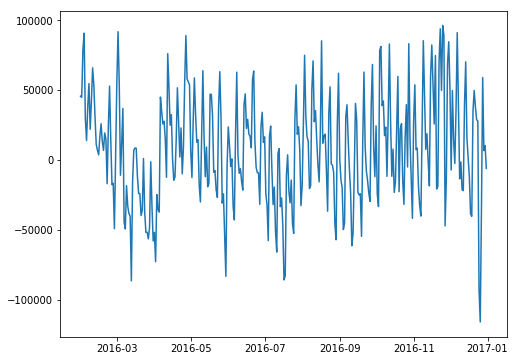

In [44]:
bitcoin_value = bitcoin.Value
bitcoin_value_diff = bitcoin_value.diff(30).dropna()
plt.figure(figsize=(8, 6))
plt.plot(bitcoin_value_diff)

In [126]:
bitcoin_value_diff

Date
2016-01-31     45852.0
2016-02-01     45002.0
2016-02-02     78860.0
2016-02-03     90934.0
2016-02-04     29911.0
2016-02-05     14053.0
2016-02-06     38432.0
2016-02-07     54879.0
2016-02-08     22133.0
2016-02-09     42185.0
2016-02-10     66112.0
2016-02-11     54170.0
2016-02-12     30807.0
2016-02-13     11278.0
2016-02-14      7170.0
2016-02-15      3822.0
2016-02-16     17096.0
2016-02-17     26049.0
2016-02-18     13469.0
2016-02-19      7030.0
2016-02-20     19519.0
2016-02-21     15019.0
2016-02-22    -16830.0
2016-02-23     24051.0
2016-02-24     53006.0
2016-02-25     14520.0
2016-02-26    -17476.0
2016-02-27    -16505.0
2016-02-28    -49031.0
2016-02-29      2075.0
                ...   
2016-12-02     -6968.0
2016-12-03     49845.0
2016-12-04     14650.0
2016-12-05     -2393.0
2016-12-06     35969.0
2016-12-07     91342.0
2016-12-08     37080.0
2016-12-09    -13349.0
2016-12-10     -1280.0
2016-12-11    -21133.0
2016-12-12    -21775.0
2016-12-13     39776.0
2016-1

In [128]:
time_series = bitcoin_value_diff

In [129]:
from statsmodels.api import tsa

In [130]:
ar = tsa.AR(time_series)
optlag = ar.select_order(30, ic="bic")
print('Optimal p =', optlag)

C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads04\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads04\lib\site-packages\statsmodels\tsa\tsatools.py:634: RuntimeWarning: invalid value encountered in log
  invarcoefs = -np.log((1-params)/(1+params))
C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads04\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads04\lib\site-packages\statsmodels\tools\numdiff.py:96: RuntimeWarning: invalid value encountered in maximum
  h = EPS**(1. / s) * np.maximum(np.abs(x), 0.1)


Optimal p = 15


C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads04\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


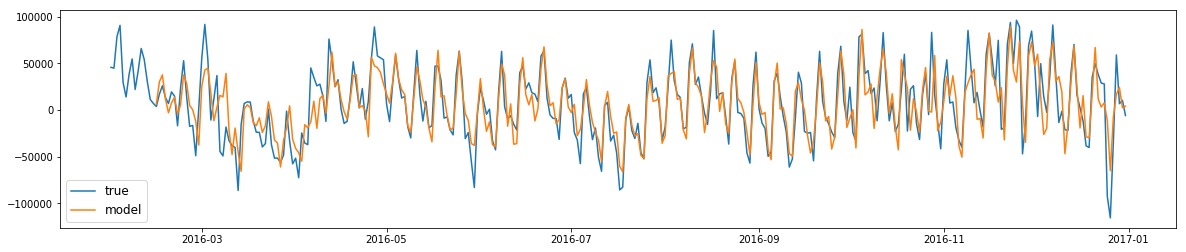

In [131]:
ar_result = ar.fit(maxlag=optlag)
prediction = ar_result.predict(start=optlag)

plt.figure(figsize=(20, 4))
plt.plot(time_series, label='true')
plt.plot(prediction, label='model')
plt.legend(fontsize=12)

In [132]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(time_series[optlag:], prediction)

16932.67811471397

In [133]:
prediction.shape

(321,)

In [134]:
len(time_series)
time_series

Date
2016-01-31     45852.0
2016-02-01     45002.0
2016-02-02     78860.0
2016-02-03     90934.0
2016-02-04     29911.0
2016-02-05     14053.0
2016-02-06     38432.0
2016-02-07     54879.0
2016-02-08     22133.0
2016-02-09     42185.0
2016-02-10     66112.0
2016-02-11     54170.0
2016-02-12     30807.0
2016-02-13     11278.0
2016-02-14      7170.0
2016-02-15      3822.0
2016-02-16     17096.0
2016-02-17     26049.0
2016-02-18     13469.0
2016-02-19      7030.0
2016-02-20     19519.0
2016-02-21     15019.0
2016-02-22    -16830.0
2016-02-23     24051.0
2016-02-24     53006.0
2016-02-25     14520.0
2016-02-26    -17476.0
2016-02-27    -16505.0
2016-02-28    -49031.0
2016-02-29      2075.0
                ...   
2016-12-02     -6968.0
2016-12-03     49845.0
2016-12-04     14650.0
2016-12-05     -2393.0
2016-12-06     35969.0
2016-12-07     91342.0
2016-12-08     37080.0
2016-12-09    -13349.0
2016-12-10     -1280.0
2016-12-11    -21133.0
2016-12-12    -21775.0
2016-12-13     39776.0
2016-1

In [135]:
train = time_series[:-10]
test = time_series[-10:]

In [136]:
ar = tsa.AR(train) # put the data into the model 
optlag = ar.select_order(30, ic='bic', method='mle') # find out the best optlag
arfit = ar.fit(maxlag=optlag) # find out the best w metrix 

prediction = arfit.predict(end=len(time_series))[-len(test):]
# arfit.predict(start=None, end=None, dynamic=False)

C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads04\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads04\lib\site-packages\statsmodels\tsa\tsatools.py:634: RuntimeWarning: invalid value encountered in log
  invarcoefs = -np.log((1-params)/(1+params))
C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads04\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads04\lib\site-packages\statsmodels\tools\numdiff.py:96: RuntimeWarning: invalid value encountered in maximum
  h = EPS**(1. / s) * np.maximum(np.abs(x), 0.1)
C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads04\lib\site-packages\statsmodels\base\model.py:488: HessianInver

56602.02988158262


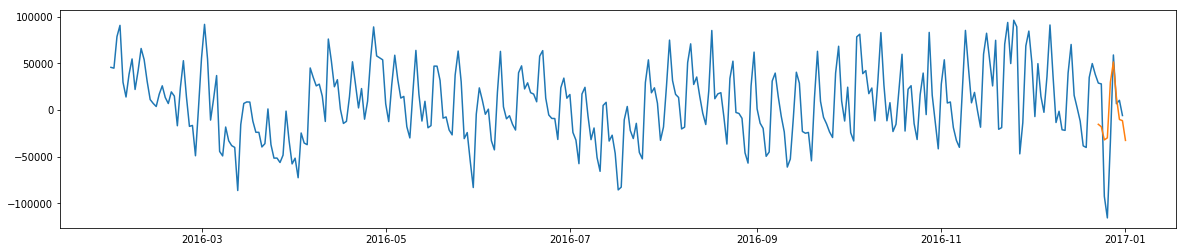

In [137]:
plt.figure(figsize=(20, 4))
plt.plot(time_series,label='originial data') #time_series is a DataFrame with date as index 
plt.plot(prediction,label='prediction') #prediction is numpy
print(mean_absolute_error(test,prediction))

Text(0,0.5,'Autocorrelation')

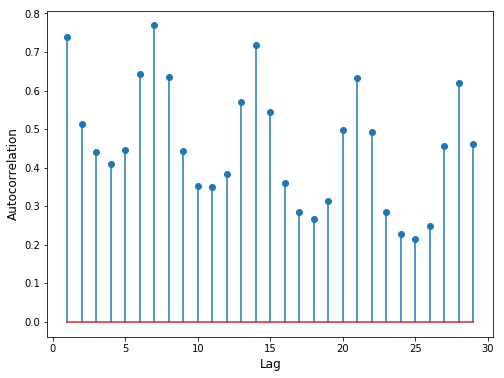

In [140]:
#Part 2: use ARMA
lags = range(1, 30)
autocorrs = [bitcoin.Value.autocorr(lag=lag) 
                   for lag in lags]
plt.figure(figsize=(8, 6))
plt.stem(lags, autocorrs)
plt.xlabel("Lag", fontsize=12)
plt.ylabel("Autocorrelation", fontsize=12)

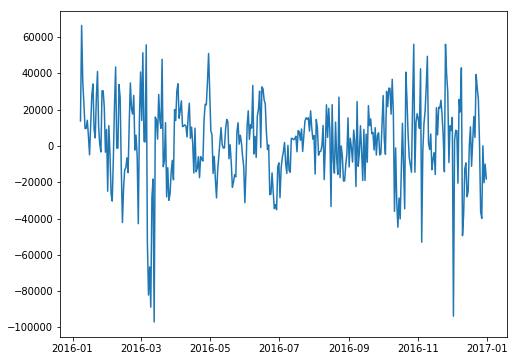

In [148]:
bitcoin_value_diff = bitcoin['Value'].diff(7).dropna()
plt.figure(figsize=(8, 6))
plt.plot(bitcoin_value_diff)
# get stationary data with difference 
#a = bitcoin['Value']  # 336 vector
#b = bitcoin.values # matrix 336*1
#index = bitcoin.index #336 vector
 

In [165]:
ar = tsa.AR(bitcoin_value_diff)
optlag = ar.select_order(30, ic="bic")
print('Optimal p =', optlag)
# find out optimal lag p is 8 

C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads04\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Optimal p = 8


In [181]:
model = tsa.ARMA(bitcoin_value_diff, order = (8,1)) # fit the model 
arma_result = model.fit() #train the model to get best 𝜙 𝜃 metrix 
prediction = arma_result.predict(start=8) #generate value starting at the optimal lag


C:\Users\sohao\AppData\Local\Continuum\miniconda3\envs\ads04\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


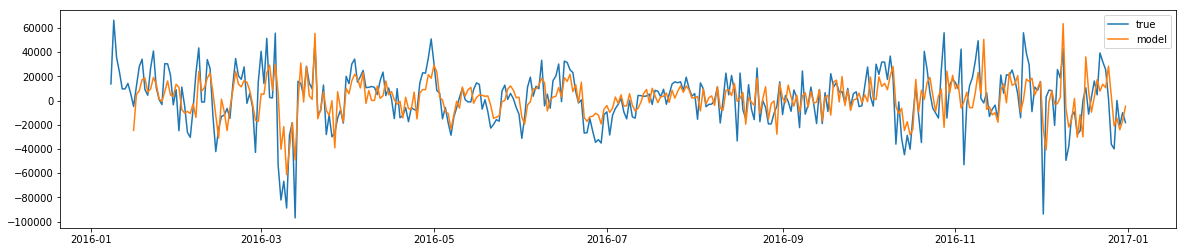

In [182]:
plt.figure(figsize=(20, 4))
plt.plot(bitcoin_value_diff, label='true')
plt.plot(prediction, label='model')
plt.legend();

In [183]:
print('MAE = {0:.3f}'.format(mean_absolute_error(bitcoin_value_diff[8:], prediction)))

MAE = 12825.402


In [196]:
date = bitcoin.index[-8:]
#date_min = date[0]
#date_max = date[-1]
#print(date_min)
#print(date_max)
prediction_test = arma_result.predict(start=date[0],end=date[-1])

2016-12-24 00:00:00
2016-12-31 00:00:00


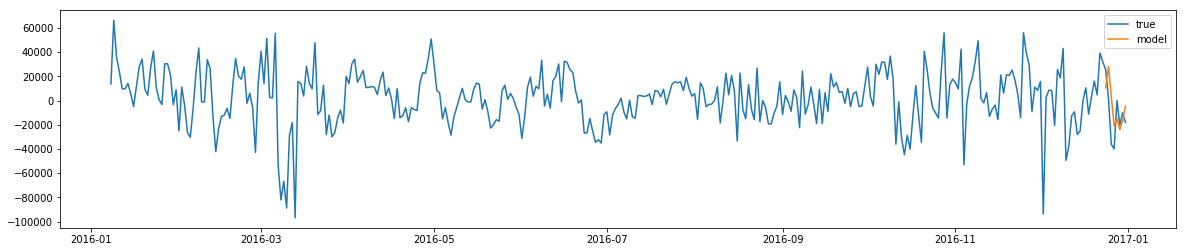

In [197]:
plt.figure(figsize=(20, 4))
plt.plot(bitcoin_value_diff, label='true')
plt.plot(prediction_test, label='model')
plt.legend();